Блок 1: Импорт библиотек и загрузка данных

In [3]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import (accuracy_score, 
                            f1_score, 
                            roc_auc_score, 
                            roc_curve)

plt.style.use('ggplot')
%matplotlib inline

# Загрузка данных
data = pd.read_csv('/home/admin/Документы/!PLEHA/LAB /II_LABS/LABS_II/LABII/bank-additional-full.csv', sep=';')

 Предобработка данных

In [4]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = LabelBinarizer().fit_transform(y).ravel()

# Конвертация категориальных признаков
X = pd.get_dummies(X)

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

Реализация моделей на TensorFlow

In [5]:
def build_model(name, input_shape, activation='sigmoid'):
    """Создает и компилирует модель нейронной сети"""
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, 
                            activation=activation, 
                            input_shape=(input_shape,))
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Создание моделей
svm_model = build_model('SVM', X_train.shape[1], activation='linear')
logistic_model = build_model('Logistic', X_train.shape[1])


/home/admin/.pyenv/versions/3.11.12/envs/mazurov_3_11_ten/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Блок 4: Обучение моделей


In [6]:

# Обучение SVM
svm_history = svm_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=64,
    verbose=0
)

# Обучение логистической регрессии
logistic_history = logistic_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=64,
    verbose=0
)

 Визуализация обучения


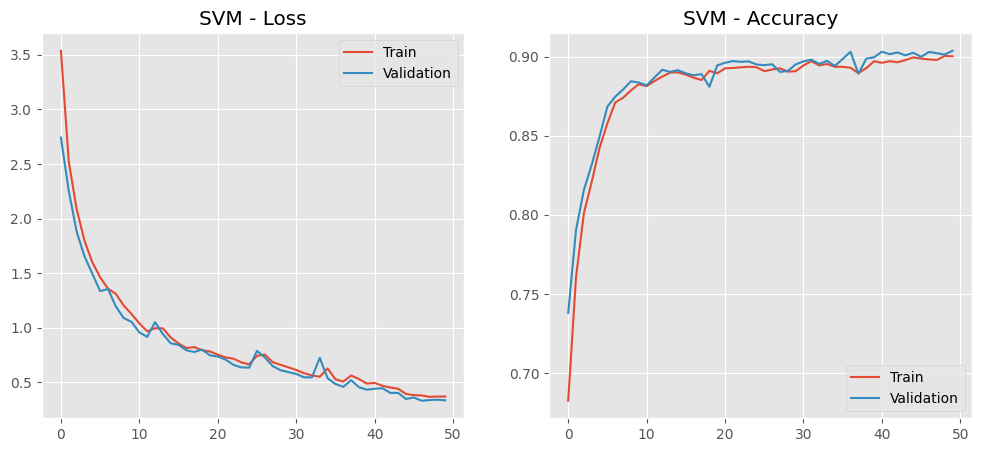

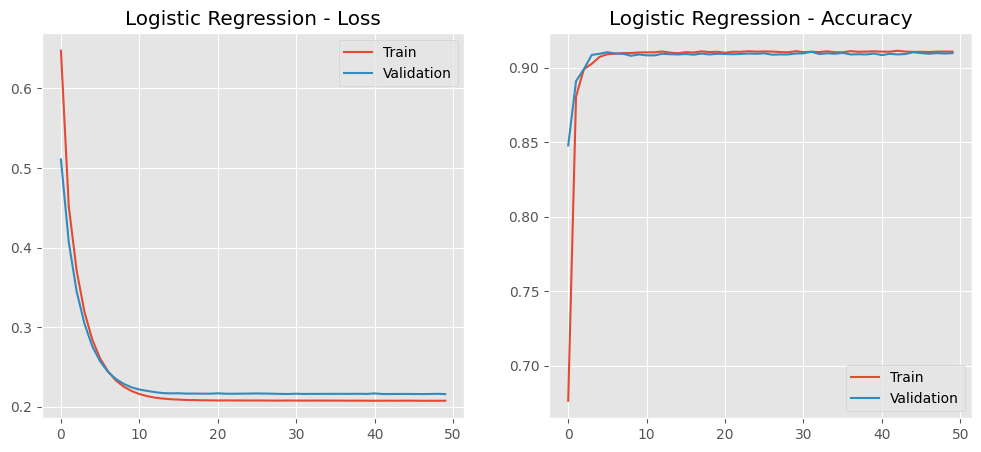

In [7]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.show()

plot_history(svm_history, 'SVM')
plot_history(logistic_history, 'Logistic Regression')

Оценка качества

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


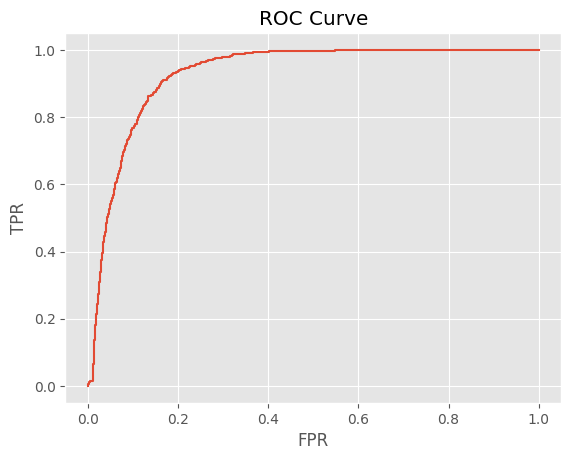

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


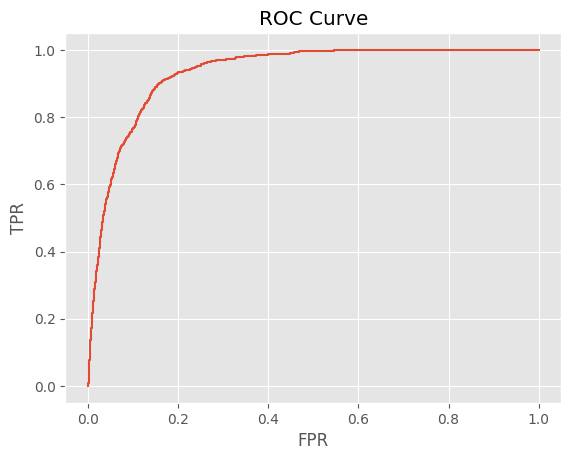

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


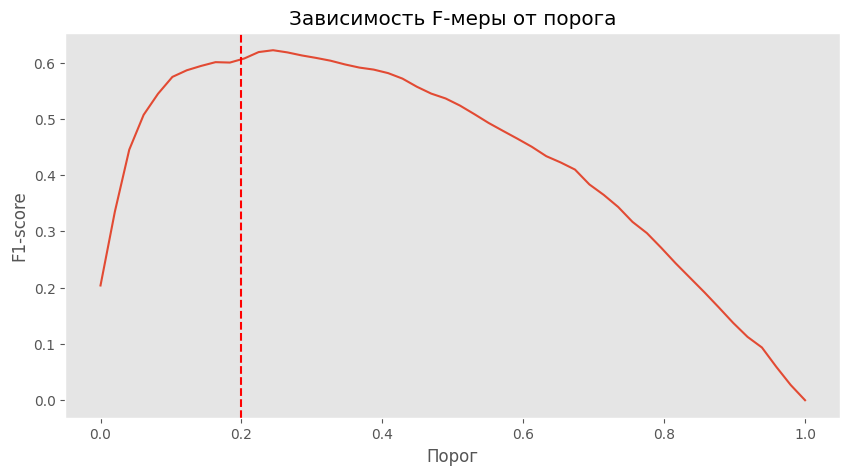

SVM Результаты:
Accuracy: 0.901 | F1: 0.453 | ROC-AUC: 0.928

Логистическая регрессия:
Accuracy: 0.911 | F1: 0.527 | ROC-AUC: 0.933


In [8]:


# %%
def evaluate_model(model, X_test, y_test):
    # Прогнозы и вероятности
    y_pred = model.predict(X_test)
    y_proba = model.predict(X_test).ravel()
    
    # Метрики
    acc = accuracy_score(y_test, y_pred > 0.5)
    f1 = f1_score(y_test, y_pred > 0.5)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # ROC-кривая
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
    return acc, f1, roc_auc

# Оценка SVM
svm_acc, svm_f1, svm_roc = evaluate_model(svm_model, X_test, y_test)

# Оценка логистической регрессии
log_acc, log_f1, log_roc = evaluate_model(logistic_model, X_test, y_test)

# ## Блок 7: Анализ пороговых значений

# График зависимости F-меры от порога
y_proba = logistic_model.predict(X_test).ravel()
grid = np.linspace(0, 1, 50)

plt.figure(figsize=(10, 5))
plt.title('Зависимость F-меры от порога')
plt.plot(grid, [f1_score(y_test, y_proba > t) for t in grid])
plt.axvline(0.2, color='red', linestyle='--')
plt.grid()
plt.xlabel('Порог')
plt.ylabel('F1-score')
plt.show()


# %%
print('SVM Результаты:')
print(f'Accuracy: {svm_acc:.3f} | F1: {svm_f1:.3f} | ROC-AUC: {svm_roc:.3f}\n')

print('Логистическая регрессия:')
print(f'Accuracy: {log_acc:.3f} | F1: {log_f1:.3f} | ROC-AUC: {log_roc:.3f}')
